In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/train.csv')

In [4]:
data = data.values

In [5]:
print(data.shape)

(42000, 785)


In [12]:
train_y = data[:,0]

In [13]:
print(train_y.shape)

(42000,)


In [14]:
train_y = train_y.reshape((-1,1))
print(train_y)

[[1]
 [0]
 [1]
 ...
 [7]
 [6]
 [9]]


In [15]:
train_x = data[:,1:]
print(train_x.shape)

(42000, 784)


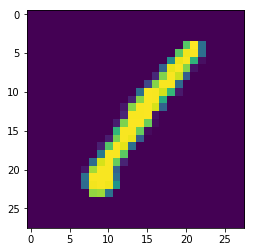

In [30]:
x = train_x[0].reshape((28,28))
x.shape
plt.imshow(x)
plt.show()

In [23]:
data = pd.read_csv('../data/test.csv')

In [24]:
test_x = data.values

In [31]:
test_x[0].shape

(784,)

In [27]:
########## KNN CODE ############
def distance(v1, v2):
    # Eucledian distance
    return np.sqrt(((v1-v2)**2).sum())

def knn(train_x,train_y, test, k=5):
    dist = []

    for i in range(train_x.shape[0]):
        # Get the vector and label
        ix = train_x[i]
        iy = train_y[i]
        # Compute the distance from test point
        d = distance(test_x, ix)
        dist.append([d, iy])
    # Sort based on distance and get top k
    dk = sorted(dist, key=lambda x: x[0])[:k]
    # Retrieve only the labels
    labels = np.array(dk)[:, -1]

    # Get frequencies of each label
    output = np.unique(labels, return_counts=True)
    # Find max frequency and corresponding label
    index = np.argmax(output[1])
    return output[0][index]
################################

In [32]:
out = knn(train_x,train_y,test_x[0])
print(out)

KeyboardInterrupt: 